In [1]:
## Temporao Coherence Improvement after proper configuration of network inversion.

import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp
from pysar.simulation.plot import *

work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

# read data
min_coherence = 0.7
metadata = readfile.read_attribute('../velocity.h5')
tcoh = []
tcoh.append(readfile.read('temporalCoherence_allNet_noWeight.h5')[0])
tcoh.append(readfile.read('temporalCoherence_cohNet_varWeight.h5')[0])
tcmask = [tc >= min_coherence for tc in tcoh]

dem = readfile.read('../INPUTS/geometryRadar.h5', datasetName='height')[0]
print('Done.')

/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV
reading height data from file: ../INPUTS/geometryRadar.h5 ...
Done.


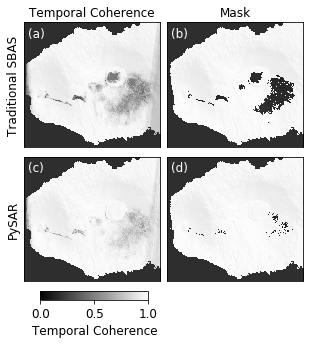

In [4]:
# plot
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[5, 6])
for i in range(len(tcoh)):
    pp.plot_dem_background(ax=ax[i, 0], geo_box=None, dem=dem, inps=inps, print_msg=False)
    pp.plot_dem_background(ax=ax[i, 1], geo_box=None, dem=dem, inps=inps, print_msg=False)
    im = ax[i, 0].imshow(tcoh[i],   vmin=0., vmax=1., cmap='gray', alpha=0.8)
    ax[i, 1].imshow(tcmask[i], vmin=0., vmax=1., cmap='gray', alpha=0.8)

num_list = ['(a)', '(b)', '(c)', '(d)']
ax_list = ax.flatten().tolist()
for i in range(len(ax_list)):
    axi = ax_list[i]
    pp.auto_flip_direction(metadata, ax=axi, print_msg=False)
    axi.get_xaxis().set_ticks([])
    axi.get_yaxis().set_ticks([])
    axi.annotate(num_list[i], xy=(0.03, 0.88), color='w', xycoords='axes fraction', fontsize=font_size)
fig.subplots_adjust(wspace=0.05, hspace=-0.3)

ax[0, 0].set_title('Temporal Coherence', fontsize=font_size)
ax[0, 1].set_title('Mask', fontsize=font_size)
ax[0, 0].set_ylabel('Traditional SBAS', fontsize=font_size)
ax[1, 0].set_ylabel('PySAR', fontsize=font_size)

# colorbar
cax = fig.add_axes([0.17, 0.16, 0.3, 0.02])
cbar = plt.colorbar(im, cax=cax, ticks=[0, 0.5, 1], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Temporal Coherence', fontsize=font_size)

plt.savefig('{}_tempCoh_compare.jpg'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [31]:
np.max(dem)

1652.6615